# Python challenges
All the challenges from python challenge solved. Web -> http://www.pythonchallenge.com

### Challenge 0 - warming up
Link: http://www.pythonchallenge.com/pc/def/0.html
<img src="c0/calc.jpg">

Hint: try to change the URL address.

In [1]:
2**38

274877906944

Then you go to http://www.pythonchallenge.com/pc/def/274877906944.html and it redirects you to the next challenge url.

### Challenge 1 - What about making trans?
Link: http://www.pythonchallenge.com/pc/def/map.html
<img src="c1/map.jpg">

everybody thinks twice before solving this.

g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj.

The first step is to get the data to a variable.

In [76]:
input_string = "g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj."

We realize that there's a 2 character difference between the character pairs so we try to move 2 positions every char

In [77]:
# We check if every character is a letter
# from a-z and if it is we shift it 2 positions in 
# the abc and store it in a new string.
sol=""
for ch in input_string:
    n = ord(ch)
    # 96 is the ascii code for a and 123 for z
    if (n>96) and (n<123):
        # since it is circular (z->b) we need to take it into account
        sol += chr((n - 96 + 2)%26 + 96)
    else:
        sol += chr(n)
print(sol)

i hope you didnt translate it by hand. thats what computers are for. doing it in by hand is inefficient and that's why this text is so long. using string.maketrans() is recommended. now apply on the url.


So we try the same on the url...

In [93]:
# Since here there are only letters we don't need to check
# it. And also there's no edge cases (y,z)
sol = ""
for ch in "map":
    n = ord(ch)
    sol += chr(ord(ch) + 2)
print(sol)

ocr


### Challenge 2 - ocr
Link: http://www.pythonchallenge.com/pc/def/ocr.html
<img src="c2/ocr.jpg">

recognize the characters. maybe they are in the book, 
but MAYBE they are in the page source.

Inspecting the source code we see that there is a huge string of strange symbols and some letters. First step is to get that in a var.

In [90]:
from urllib.request import urlopen
import re

html=urlopen("http://www.pythonchallenge.com/pc/def/ocr.html").read().decode()
# Since the string is surrounded by comment symbols we can regex that
input_string = re.findall(r'<!--[^-->]*-->',str(html))[0][5:-3]
# Two line sample
print(input_string[:160])

%%$@_$^__#)^)&!_+]!*@&^}@[@%]()%+$&[(_@%+%$*^@$^!+]!&_#)_*}{}}!}_]$[%}@[{_@#_^{*
@##&{#&{&)*%(]{{([*}@[@&]+!!*{)!}{%+{))])[!^})+)$]#{*+^((@^@}$[**$&^{$!@#$%)!@(


Then we keep only the letters and see what we get

In [91]:
sol=""
for ch in input_string:
    n = ord(ch)
    if (n>96) and (n<123):
        sol += ch
print(sol)

equality


### Challenge 3 - re
<img src="c3/bodyguard.jpg">

One small letter, surrounded by EXACTLY three big bodyguards on each of its sides.

Looking at see source code we see something similar to the previous challenge, a huge string in the comments. First step get that in a var.

In [101]:
from urllib.request import urlopen
import re

html=urlopen("http://www.pythonchallenge.com/pc/def/equality.html").read().decode()
# Since the string is surrounded by comment symbols we can regex that
input_string = re.findall(r'<!--[^-->]*-->',str(html))[0][5:-3]
# Two line sample
print(input_string[:160])

kAewtloYgcFQaJNhHVGxXDiQmzjfcpYbzxlWrVcqsmUbCunkfxZWDZjUZMiGqhRRiUvGmYmvnJIHEmbT
MUKLECKdCthezSYBpIElRnZugFAxDRtQPpyeCBgBfaRVvvguRXLvkAdLOeCKxsDUvBBCwdpMMWmuELe


The next is to look for exactly what the hint says, look for a lower case letter surrounded by 3 upper case words.

In [96]:
import re
matches = re.findall(r'[a-z][A-Z]{3}[a-z][A-Z]{3}[a-z]', input_string)
print(matches)

['qIQNlQSLi', 'eOEKiVEYj', 'aZADnMCZq', 'bZUTkLYNg', 'uCNDeHSBj', 'kOIXdKBFh', 'dXJVlGZVm', 'gZAGiLQZx', 'vCJAsACFl', 'qKWGtIDCj']


Aparently this is nonsense, but looking closely you realize that there's the result in there...

In [99]:
[res[4] for res in matches]

['l', 'i', 'n', 'k', 'e', 'd', 'l', 'i', 's', 't']

### Challenge 4 - follow the chain
Link: http://www.pythonchallenge.com/pc/def/linkedlist.php
<img src="c4/chainsaw.jpg">

When we click the image it takes us to http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing=12345 and we see `and the next nothing is 44827.` Then if you replace 12345 for the 44827 you get a new page with a different number. So here clearly we have to keep going until we find no number...

In [122]:
from urllib.request import urlopen
import re

base_url = "http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing="
next_num = 12345
while True:
    try:
        next_num = re.findall(r'[0-9]+', urlopen(base_url+str(next_num)).read().decode())[0]
    except:
        print(f"Current number: {next_num}")
        print(urlopen(base_url+str(next_num)).read())
        break

Current number: 16044
b'Yes. Divide by two and keep going.'


So we do as it says

In [124]:
next_num = 16044//2

And keep going...

In [125]:
while True:
    try:
        next_num = re.findall(r'[0-9]+', urlopen(base_url+str(next_num)).read().decode())[0]
    except:
        print(f"Current number: {next_num}")
        print(urlopen(base_url+str(next_num)).read())
        break

Current number: 82683
b"You've been misleaded to here. Go to previous \none and check."


So next go to none and see...

In [126]:
next_num = "none"
while True:
    try:
        next_num = re.findall(r'[0-9]+', urlopen(base_url+str(next_num)).read().decode())[0]
    except:
        print(f"Current number: {next_num}")
        print(urlopen(base_url+str(next_num)).read())
        break

Current number: 66831
b'peak.html'


### Challenge 5 - peak hell
Link: http://www.pythonchallenge.com/pc/def/peak.html
<img src="c5/peakhell.jpg">

pronounce it

Here there are two tricks, the first is to realize that peak hell sounds like pickle and that's a python library used for object serialization.

The second is to check the source code and see that there's the line `<peakhell src="banner.p"/>` which suggests going to banner.p and see what we get. In fact we get a file that we can open with the pickle library.

In [131]:
from urllib.request import urlopen
import pickle

con = urlopen("http://www.pythonchallenge.com/pc/def/banner.p")
data = pickle.load(con)

The result is a 95x23 matrix expressed in a run length enconding, we can try to print it and see what we get...

In [135]:
st = ""
for line in data:
    for char in line:
        st += char[0]*char[1]
    st += "\n"
print(st)

                                                                                               
              #####                                                                      ##### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
      ###      ####   ###         ###       #####   ###    #####   ###          ###       #### 
   ###   ##    #### #######     ##  ### 

### Challenge 6 - now there are pairs
Link: http://www.pythonchallenge.com/pc/def/channel.html
<img src="c6/channel.jpg">

The first idea is to change the url ending for .zip, so it downloads a zip.

In [10]:
import urllib.request 
urllib.request.urlretrieve("http://www.pythonchallenge.com/pc/def/channel.zip", "c6/channel.zip")

('c6/channel.zip', <http.client.HTTPMessage at 0x211ad3eda58>)

There's a readme file:

In [22]:
from zipfile import ZipFile
# Load file and read readme
with ZipFile('c6/channel.zip') as myzip:
    with myzip.open('readme.txt') as myfile:
        print(myfile.read().decode())

welcome to my zipped list.

hint1: start from 90052
hint2: answer is inside the zip



This is like the previous challenge where you have to keep going until you find the final url. So we do as before...

In [25]:
import re
# Recursive opening of files
with ZipFile('c6/channel.zip') as myzip:
    file_name = "90052.txt"
    while True:
        myfile = myzip.open(file_name)
        file_content = myfile.read().decode()
        try:
            file_name = re.findall(r'[0-9]+', file_content)[0]+".txt"
        except:
            print(file_content)
            break

Next nothing is 94191


Reading about the zip standard you see that there is a header field for comments in every file compressed in a zip, so maybe reading them and printing in the order that the tell the files will get us the message...

In [30]:
import re
# Recursive opening of files
with ZipFile('c6/channel.zip') as myzip:
    file_name = "90052.txt"
    while True:
        myfile = myzip.open(file_name)
        file_content = myfile.read().decode()
        try:
            file_name = re.findall(r'[0-9]+', file_content)[0]+".txt"
            print(myzip.getinfo(file_name).comment.decode(), end="")
        except:
            break

***************************************************************
****************************************************************
**                                                            **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE NN      NN  **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE  NN    NN   **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE       NN  NN    **
**   OOOOOOOO XX    XX YY        GGG       EEEEE     NNNN     **
**   OOOOOOOO XX    XX YY        GGG       EEEEE      NN      **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE         NN      **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE     NN      **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE     NN      **
**                                                            **
****************************************************************
 **************************************************************


We are not done yet, when visiting hockey.html appears the next:

In [38]:
from urllib.request import urlopen
print(urlopen("http://www.pythonchallenge.com/pc/def/"+"hockey.html").read().decode())

it's in the air. look at the letters. 



So guessing a little, we get to oxygen.html

### Challenge 7 - smarty
Link: http://www.pythonchallenge.com/pc/def/oxygen.html
<img src="c7/oxygen.png">

In this challenge the first that comes to mind is to read the grayscale values from the middle line and decode it as ascii and see what we get.

Doing a bit of analysis with any image processing software we see that the squares are 7 pixels wide and that the line ends at the 610 pixel, se we select that range to analyze it.

In [19]:
from PIL import Image
import numpy as np

im = Image.open('c7/oxygen.png').convert('L')
mat = np.array(im)

selected = mat[48][2:610:7]

for i in range(len(selected)):
    print(chr(selected[i]), end="")

smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]

So we decode the same way as before...

In [20]:
result = [105, 110, 116, 101, 103, 114, 105, 116, 121]

for ch in result:
    print(chr(ch), end="")

integrity

### Challenge 8 - working hard?
Link: http://www.pythonchallenge.com/pc/def/integrity.html
<img src="c8/integrity.jpg">
Where is the missing link?

When clicking the bee in the photo a prompt appears asking for user and password. And reading the source we see a user and password in a weird format... 

In [22]:
un = b'BZh91AY&SYA\xaf\x82\r\x00\x00\x01\x01\x80\x02\xc0\x02\x00 \x00!\x9ah3M\x07<]\xc9\x14\xe1BA\x06\xbe\x084'
pw = b'BZh91AY&SY\x94$|\x0e\x00\x00\x00\x81\x00\x03$ \x00!\x9ah3M\x13<]\xc9\x14\xe1BBP\x91\xf08'

Reading around you learn that if a file starts with BZ it is compressed with bzip2. And Python has a module for it in the stl, so let's try

In [23]:
import bz2
print(bz2.decompress(un))
print(bz2.decompress(pw))

b'huge'
b'file'


When entering the user and password to the prompt it takes you to the next challenge.

### Challenge 9 - connect the dots
Link: http://www.pythonchallenge.com/pc/def/integrity.html
<img src="c9/good.jpg">

In this challenge the author is messing with you... The first thought is to connect the dots in the image and see what you get, then you get nothing. Next you check the source code and see two arrays and try to match in anyway to the image, this is also incorrect and you get nothing.

Instead of all of that, the correct way to work through this is to just plot the arrays in the source, picking two elements of the array for every coordinate.

In [26]:
first = [146,399,163,403,170,393,169,391,166,386,170,381,170,371,170,355,169,346,167,335,170,329,170,320,170,
310,171,301,173,290,178,289,182,287,188,286,190,286,192,291,194,296,195,305,194,307,191,312,190,316,
190,321,192,331,193,338,196,341,197,346,199,352,198,360,197,366,197,373,196,380,197,383,196,387,192,
389,191,392,190,396,189,400,194,401,201,402,208,403,213,402,216,401,219,397,219,393,216,390,215,385,
215,379,213,373,213,365,212,360,210,353,210,347,212,338,213,329,214,319,215,311,215,306,216,296,218,
290,221,283,225,282,233,284,238,287,243,290,250,291,255,294,261,293,265,291,271,291,273,289,278,287,
279,285,281,280,284,278,284,276,287,277,289,283,291,286,294,291,296,295,299,300,301,304,304,320,305,
327,306,332,307,341,306,349,303,354,301,364,301,371,297,375,292,384,291,386,302,393,324,391,333,387,
328,375,329,367,329,353,330,341,331,328,336,319,338,310,341,304,341,285,341,278,343,269,344,262,346,
259,346,251,349,259,349,264,349,273,349,280,349,288,349,295,349,298,354,293,356,286,354,279,352,268,
352,257,351,249,350,234,351,211,352,197,354,185,353,171,351,154,348,147,342,137,339,132,330,122,327,
120,314,116,304,117,293,118,284,118,281,122,275,128,265,129,257,131,244,133,239,134,228,136,221,137,
214,138,209,135,201,132,192,130,184,131,175,129,170,131,159,134,157,134,160,130,170,125,176,114,176,
102,173,103,172,108,171,111,163,115,156,116,149,117,142,116,136,115,129,115,124,115,120,115,115,117,
113,120,109,122,102,122,100,121,95,121,89,115,87,110,82,109,84,118,89,123,93,129,100,130,108,132,110,
133,110,136,107,138,105,140,95,138,86,141,79,149,77,155,81,162,90,165,97,167,99,171,109,171,107,161,
111,156,113,170,115,185,118,208,117,223,121,239,128,251,133,259,136,266,139,276,143,290,148,310,151,
332,155,348,156,353,153,366,149,379,147,394,146,399]

second = [156,141,165,135,169,131,176,130,187,134,191,140,191,146,186,150,179,155,175,157,168,157,163,157,159,
157,158,164,159,175,159,181,157,191,154,197,153,205,153,210,152,212,147,215,146,218,143,220,132,220,
125,217,119,209,116,196,115,185,114,172,114,167,112,161,109,165,107,170,99,171,97,167,89,164,81,162,
77,155,81,148,87,140,96,138,105,141,110,136,111,126,113,129,118,117,128,114,137,115,146,114,155,115,
158,121,157,128,156,134,157,136,156,136]

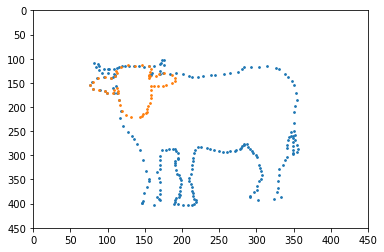

In [48]:
import matplotlib.pyplot as plt
plt.axis([0, 450, 0, 450])
plt.gca().invert_yaxis()
plt.scatter(first[0::2],first[1::2], s=3)
plt.scatter(second[0::2],second[1::2], s=3)

Well this looks like a bull to me.

### Challenge 11 - odd even
Link: http://www.pythonchallenge.com/pc/return/c.html
<img src="c11/cave.jpg">

len(a[30])=?

When clicking on the cow we get the following text:

``a = [1, 11, 21, 1211, 111221, ``

Thinking about this you see that this looks kinda like a run-length encoding, so you build one for the sake of the challenge...

In [54]:
seq="1"
for i in range(30):
    st = ""
    while len(seq)>0:
        m = re.search( r'^([0-9])\1*', seq).group()
        seq = seq[len(m):]
        st += f"{len(m)}{m[0]}"
    seq=st
len(st)

5808

### Challenge 11 - odd even
Link: http://www.pythonchallenge.com/pc/return/5808.html
<img src="c11/cave.jpg">

In [62]:
from PIL import Image
import numpy as np
im = Image.open('c11/cave.jpg').convert('L')
mat = np.array(im)

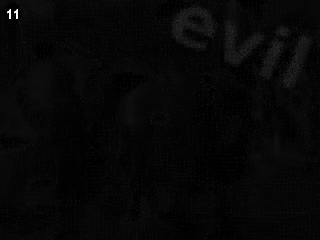

In [63]:
Image.fromarray(mat[::2,::2], 'L')

And looking at the top right we see evil. If you don't see it download the image and max the brightness and there it will appear.

### Challenge 12 - odd even
Link: http://www.pythonchallenge.com/pc/return/evil.html
<img src="c12/evil1.jpg">

This is the hardest challenge in my opinion, the frustration level was hilarius, anyway we got it done. 

The first trick is to realize that there are multiple photos, because the photo in the html page is `evil1.jpg` then there exists `evil2.jpg` and `evil3.jpg`.

In [ ]:
# Show photos

The second photo suggests that the file format is wrong and that it is gfx. In effect, changing the ending provides us with a new file in an obscure format...

In [249]:
# Read source
f = open('evil2.gfx','rb').read()

Then here it comes the difficult trick, you have to realize that it contains 5 different files interspersed in the bytes of the .gfx. 

How did I realize this? by looking for what file format header matched the first pixels of the file. I got results for the PNG format. In this one the header looks like this(hex) -> `89 50 4E 47` and the three latter bytes are `PNG` in ASCII. So trying to look for ASCII in the bytes of the .gfx you see that they are 5 bytes away.

Then you match this idea with the evil1.jpg photo, in the photo there appear 5 decks

In [254]:
f

b'\xff\x89G\x89\xff\xd8PIP\xd8\xffNFN\xff\xe0G8G\xe0\x00\r7\r\x00\x10\na\n\x10J\x1a@\x1aJF\n\x01\nFI\x00\xf0\x00IF\x00\x00\x00F\x00\x00\xe7\x00\x00\x01\r\x00\r\x01\x01I\x00I\x01\x01H\x00H\x01\x00D\x01D\x00\xb4R\x00R\xb4\x00\x00\x00\x00\x00\xb4\x00\x01\x00\xb4\x00\x01\x04\x01\x00\x00\x90\x02@\x00\xff\x00\x00\x00\xff\xe1\x00\x05\x00\xe1\x08\x01\x00\x00\x0b\xa4,\x02\xf0\xdfE\x08\x00\x08Ex\x02\x06\x02xi\x00\x00\x00if\x00\x00\x00f\x00\x00\x04\x00\x00\x00b\x00\xfe\x00M\xd5\x06OMMr\x00*M\x00\x95\x01<\x00*\x00\x0e\x00*\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x06\x06\t\x00\x08b\x01p\x08\x00K\x04H\x00\x00G\x00Y\x00\x00D\x00s\x00\x00\x00\x04\x00\x00\x00\x00\x07\x00\x00\x0e\x00\x05\x1b\x0e\x00\x00\x02\xaf\x00\x02\x00\x07\x00\x02\x02\x00\x00\x00\x02\x01\xf9\x05\x1b\x01\x00C\t\xaf\x00\x04\xbb\x00\x01\x04\x00\x7f\x03^\x00\x00\x00\x15\x1a\x00\x00\x00\x06\x91\x00\x01\x00\x01\x1c\x01\x00\t\x15\x00\x00\x00p\x03\x00\x00\x00H\x04\x00\x00,Y\x10\x07,\x02s\x07t\x02\x02\x00\x04I\x02\x00\x00\nM\x00\x04\x1b\

In [236]:
len(f)//5

13515

In [255]:
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xb4\x00\xb4\x00\x00\xff\xe1\x0b\xdfExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x00\x00\x00\x00\x0e\x00\x02\x02\x01\x00\x04\x00\x00\x00\x01\x00\x00\x00,\x02\x02\x00\x04\x00\x00\x00\x01\x00\x00\x0b\xab\x00\x00\x00\x00\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc0\x00\x11\x08\x00\x93\x00\xc4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00

In [256]:
ar = list()
for i in range(5):
    data = f[i::5]
    ar.append(data)
    open(f'{i}.jpg', 'wb').write(data)


In [262]:
ar[1]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01,\x08\x02\x00\x00\x00b\xd5r\x95\x00\x00\x00\x06bKGD\x00\x00\x00\x00\x00\x00\xf9C\xbb\x7f\x00\x00\x00\tpHYs\x00\x00\x1b\xaf\x00\x00\x1b\xaf\x01^\x1a\x91\x1c\x00\x00\x00\x07tIME\x07\xd5\x05\x01\x13 ;\xc4\x94\x1f\x86\x00\x00 \x00IDATx\xda\xed\xddkw\x1bG\xb2%\xec\xbd#\xb3\xaa\x00^$\xf92\xbd\xce\xff\xffo\xf3\xbesz\x8eu#\t\xd4%3\xf6|\xc8*\x00\xa4\xa4\x96lK\xb6D\xc7\xb3z\xb9\xd5mJ\x82@U 322\x02\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10B\x08!\x84\x10

Next link : http://www.pythonchallenge.com/pc/return/disproportional.html

In [ ]:
# Challenge 12

In [5]:
import xmlrpc.client
s = xmlrpc.client.ServerProxy("http://www.pythonchallenge.com/pc/phonebook.php")
s.system.listMethods()

['phone',
 'system.listMethods',
 'system.methodHelp',
 'system.methodSignature',
 'system.multicall',
 'system.getCapabilities']

In [16]:
s.system.methodHelp('phone')

'Returns the phone of a person'

In [11]:
s.phone('Bert')

'555-ITALY'

In [ ]:
# Challenge 13

In [1]:
from PIL import Image
import numpy as np

In [14]:
im = Image.open('wire.png').convert('L')
mat = np.array(im)

In [17]:
mat[:,100:200].shape

(1, 100)

In [9]:
new = np.zeros((100,100),dtype="uint8")

In [28]:
for i in range(100):
    new[:,i] = mat[0,(i*100):((i+1)*100)]

In [24]:
new

array([[178, 178, 178, ..., 183, 183, 183],
       [183, 182, 182, ...,  71,  72,  72],
       [ 73,  74,  71, ..., 183, 183, 183],
       ...,
       [ 78,  83,  85, ...,  83,  98,  93],
       [ 93,  88,  84, ..., 105, 107, 106],
       [ 97,  91,  78, ...,  68,  70,  68]], dtype=uint8)

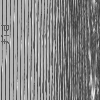

In [29]:
im = Image.fromarray(new, 'L')
im

In [59]:
new = np.zeros((3,3),dtype="uint8")

In [62]:
new

array([[0, 1, 0],
       [0, 2, 0],
       [0, 3, 0]], dtype=uint8)

In [63]:
new[3:1,1] = test

ValueError: could not broadcast input array from shape (3) into shape (0)

In [58]:
test = np.array((1,2,3))

In [48]:
test

array([1, 2, 3])

In [49]:
np.rot90(test)

ValueError: Axes must be different.

In [42]:
np.flip(test,0)

array([3, 2, 1])

In [78]:
mat[0,0:100].shape

(100,)

In [97]:
n

100

In [96]:
pos['x']

98

In [115]:
im = Image.open('wire.png')
delta = [(1,0),(0,1),(-1,0),(0,-1)]
out = Image.new('RGB', [100,100])
x,y,p = -1,0,0
d = 200
while d/2>0:
    for v in delta:
        steps = d // 2
        for s in range(steps):
            x, y = x + v[0], y + v[1]
            out.putpixel((x, y),im.getpixel((p,0)))
            p += 1
        d -= 1

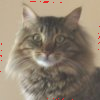

In [116]:
out

In [114]:
n

98

In [111]:
pos['y']-(n-2)

3

In [35]:
# remember: 100*100 = (100+99+99+98) + (... 

In [108]:
np.flip(pix)

array([182, 182, 182, 183, 183, 183, 183, 181, 181, 183, 183, 184, 184,
       182, 182, 184, 183, 181, 181, 182, 184, 185, 186, 184, 184, 184,
       184, 183, 183, 185, 186, 183, 183, 183, 182, 182, 182, 182, 182,
       181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181,
       181, 181,  98,  98,  98,  98,  98, 181, 181, 181,  98, 182, 182,
       181, 181,  98,  98,  98,  98,  98,  98, 183, 184, 181, 178, 178,
       177, 177, 178, 176, 176, 180, 183, 182, 179, 181, 181, 180, 180,
       180, 180, 181, 181, 180, 180, 179], dtype=uint8)